In [4]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [8]:
x= df.drop(columns = ['Survived'])
y = df['Survived']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [10]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [11]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16132\1258921994.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [12]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,63.0
493,71.0,49.5042,71.0
527,NaN,221.7792,31.0


In [20]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([25.  , 13.  , 30.  , 45.  , 29.  , 33.  , 16.  ,  3.  , 32.  ,
       36.  , 43.  , 30.  , 24.  , 18.  ,  7.  , 18.  ,  6.  , 30.  ,
       28.  , 26.  , 16.  , 23.  , 37.  , 71.  , 62.  , 39.  ,  4.  ,
       65.  , 27.  , 56.  ,  4.  , 32.  , 45.  , 26.  , 22.  , 32.  ,
       34.  ,  8.  , 11.  , 36.  , 24.  , 21.  , 12.  , 26.  , 17.  ,
       14.5 , 64.  , 18.  , 41.  , 31.  , 34.  ,  1.  , 29.  , 24.  ,
        7.  , 42.  , 51.  , 32.  , 29.  , 40.  , 28.  , 17.  , 40.  ,
       39.  , 31.  , 15.  , 16.  , 35.  , 24.  , 15.  ,  9.  , 22.  ,
       23.  , 36.  , 29.  , 44.  , 19.  , 31.  , 17.  , 52.  , 29.  ,
       27.  , 39.  , 20.  , 54.  , 44.  , 23.  , 25.  , 19.  , 33.  ,
       48.  ,  0.83,  7.  , 29.  , 47.  , 31.  , 35.  , 52.  , 31.  ,
       14.  ,  4.  ,  0.42, 24.  ,  9.  , 24.  , 30.  , 42.  , 33.  ,
       19.  ,  9.  , 18.  , 28.  , 20.  , 31.  , 30.  , 20.  , 35.  ,
       32.  , 50.  , 53.  , 24.  , 32.5 , 14.  , 18.  , 33.  , 50.  ,
        4.  , 30.  ,

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16132\2983460042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label = 'Original',hist = False)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16132\2983460042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_

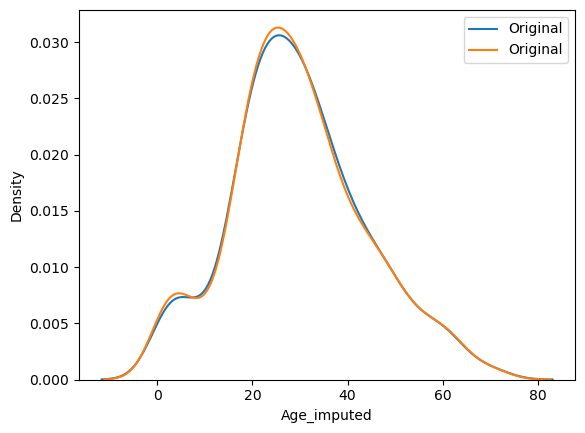

In [26]:
sns.distplot(x_train['Age'],label = 'Original',hist = False)
sns.distplot(x_train['Age_imputed'],label = 'Original', hist = False)
plt.legend()

In [28]:
print('original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ',x_train['Age_imputed'].var())

original variable variance:  204.3495133904614
Variance after random imputation:  206.4929877558115


In [30]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,59.337180
Age,71.512440,204.349513,204.349513
Age_imputed,59.337180,204.349513,206.492988


<Axes: >

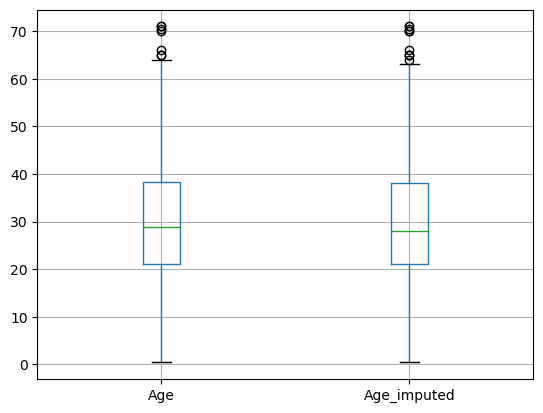

In [32]:
x_train[['Age','Age_imputed']].boxplot()